# Assignment 3

- **Name: Himanshu Ruhela**
- **Roll No: 2018IMT-039**
- **Course: Machine Learning Lab**
- **Course Code: ITIT-4107**
- **Deadline: 23:59, 2 October 2021**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
from mpl_toolkits.mplot3d import art3d
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

### (a) Generate 50 data points (one-dimensional problem) with x uniform distance from (0,1) and generate y from the formula y=sin(1+x^2)+noise Where noise has (0,0.032) distribution. Divide the data into training and test (8:2). Scatter plot the y values as well as plot the noise-free true function for train and test separately.

In [66]:
X = np.random.uniform(low=0.0, high=1.0, size=(50,1))

noise = np.random.uniform(low=0.0, high=0.032, size=(50,1))
y_vals = np.sin(1+np.square(X))

y = np.add(y_vals,noise)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y_vals, test_size=0.2, random_state=42)

Text(0.5, 1.0, 'Test Data')

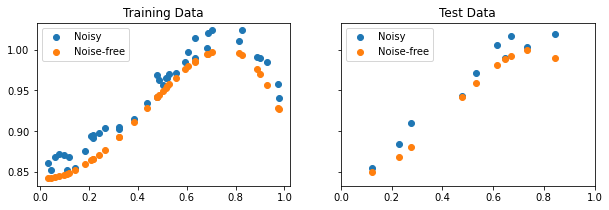

In [85]:
fig, ax = plt.subplots(1,2,figsize=(10,3),sharey=True)
plt.xlim([0, 1])

ax[0].scatter(x =X_train, y = y_train, label="Noisy")
ax[0].scatter(x =X_train, y = y_train_nn, label="Noise-free")
ax[0].legend()
ax[0].set_title("Training Data")

ax[1].scatter(x =X_test, y = y_test, label="Noisy")
ax[1].scatter(x =X_test, y = y_test_nn, label="Noise-free")
ax[1].legend()
ax[1].set_title("Test Data")

### (b) Implement the linear and polynomial regression models using the closed form solution as taught in the class on training data and explore their effectiveness in creating a predictor that best approximates the data using test data. Calculate the RMSE error and show the test and train results with varying degrees of a polynomial regression model to fit the data.

In [29]:
def getPoweredX(deg, X_t):
    X_pow = X_t.copy()
    for i in range(2, deg + 1):
        powmat = (X_t[:, 1] ** i).reshape(X_pow.shape[0], 1)
        X_pow = np.append(X_pow, powmat, axis=1)
    return X_pow

def calculateEmpricalRisk(yh):
    error = sum((y - yh) ** 2)
    return error / len(y)

Direct Method
Empirical risk for degree 1 model:  [0.00084448]


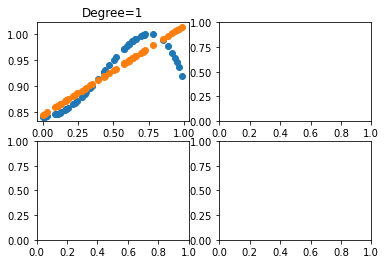

In [57]:
print("Direct Method")

X_train = np.append(np.ones((X.shape[0], 1)), X, axis=1)
Y = y_vals
fig, ax = plt.subplots(2, 2)

# For degree 1 polynomial
deg1 = 1
X1 = getPoweredX(deg1, X_train)

first_part = np.linalg.inv(np.dot(X1.transpose(), X1))
second_part = np.dot(first_part, X1.transpose())
W1 = np.dot(second_part, Y)

ax[0][0].scatter(X, Y)
ax[0][0].scatter(X1[:,1], np.dot(X1, W1))
ax[0][0].set_title("Degree=1")
print("Empirical risk for degree 1 model: ", calculateEmpricalRisk(np.dot(X1, W1)))

In [58]:
# For degree 2 polynomial
deg2 = 2
X2 = getPoweredX(deg2, X_train)

first_part = np.linalg.pinv(np.dot(X2.transpose(), X2))
second_part = np.dot(first_part, X2.transpose())
W2 = np.dot(second_part, Y)

ax[0][1].scatter(X, Y)
ax[0][1].scatter(X2[:,1], np.dot(X2, W2))
ax[0][1].set_title("Degree=2")
print("Empirical risk for degree 2 model: ", calculateEmpricalRisk(np.dot(X2, W2)))

Empirical risk for degree 2 model:  [0.00035375]


In [59]:
# For degree 3 polynomial
deg3 = 3
X3 = getPoweredX(deg3, X_train)

first_part = np.linalg.pinv(np.dot(X3.transpose(), X3))
second_part = np.dot(first_part, X3.transpose())
W3 = np.dot(second_part, Y)

ax[1][0].scatter(X, Y)
ax[1][0].scatter(X3[:,1], np.dot(X3, W3))
ax[1][0].set_title("Degree=3")
print("Empirical risk for degree 3 model: ", calculateEmpricalRisk(np.dot(X3, W3)))

Empirical risk for degree 3 model:  [5.73374264e-06]


In [60]:
# For degree 4 polynomial
deg4 = 4
X4 = getPoweredX(deg4, X_train)

first_part = np.linalg.pinv(np.dot(X4.transpose(), X4))
second_part = np.dot(first_part, X4.transpose())
W4 = np.dot(second_part, Y)

ax[1][1].scatter(X, Y)
ax[1][1].scatter(X4[:,1],np.dot(X4,W4))
ax[1][1].set_title("Degree=4")
print("Empirical risk for degree 4 model: ", calculateEmpricalRisk(np.dot(X4, W4)))

Empirical risk for degree 4 model:  [9.51144488e-09]


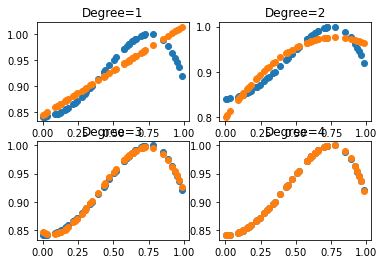

In [61]:
fig